In [74]:
!tshark -2 -r ../data/test/pageload_pcap_aljazeera.net_4.pcap -T fields -e frame.time_epoch -e ip.id -e ip.ttl -e ip.dst -e ip.src -e tcp.srcport -e tcp.dstport -e tcp.len -e tcp.stream -e tcp.seq -e tcp.window_size -e tcp.ack -e tcp.flags -e tcp.flags.reset -e tcp.flags.str -e tcp.analysis.initial_rtt -e tcp.analysis.ack_rtt -e rtitcp.response_time -e cflow.total_tcp_rst -e cflow.tcpflags.rst -e tcp.options.timestamp.tsval -e tcp.options.timestamp.tsecr -e tcp.options.timestamp -e http.host -e http.response.code -e http.user_agent -e http.location -o "tls.keylog_file: ./../data_collection/ssl_key_log_file.log" -o "ssl.keylog_file: ./../data_collection/ssl_key_log_file.log" > testcsv.txt



** (process:1299): WARNING **: 22:39:53.011: Preference "ssl.keylog_file" has been converted to "tls.keylog_file"
Save your preferences to make this change permanent.


In [2]:
import pandas as pd
import numpy as np
import functools
from matplotlib import pylab as plt

In [3]:
data = pd.read_csv('../data/test/csv_aljazeera.net_11.csv', delimiter='\t',
            names=
                ('time_epoch ipid ipttl dstip srcip tcpsrcport tcpdstport tcplen tcpstream tcpseq tcpwindowsize tcpack tcpflags tcpflagsrst tcpflagsstr '
                'initial_rtt ack_rtt response_time total_tcp_rst cflowrst tsval tsecr tcptimestamp host code user_agent location').split())
data['intid'] = data.ipid.apply(functools.partial(int, base=16))
data.time_epoch -= data.time_epoch.min()

In [23]:
data[(~data.tcpstream.isnull())]

,time_epoch,ipid,ipttl,dstip,srcip,tcpsrcport,tcpdstport,tcplen,tcpstream,tcpseq,...,total_tcp_rst,cflowrst,tsval,tsecr,tcptimestamp,host,code,user_agent,location,intid
2,0.000540,0x00002edf,64,13.48.205.10,172.25.50.98,55342.0,80.0,0.0,0.0,0.0,...,NaN,NaN,2.135285e+09,0.000000e+00,080a7f45dc8500000000,NaN,NaN,NaN,NaN,11999
3,0.104429,0x00000000,233,172.25.50.98,13.48.205.10,80.0,55342.0,0.0,0.0,0.0,...,NaN,NaN,3.574695e+08,2.135285e+09,080a154e8d3f7f45dc85,NaN,NaN,NaN,NaN,0
4,0.104481,0x00002ee0,64,13.48.205.10,172.25.50.98,55342.0,80.0,0.0,0.0,1.0,...,NaN,NaN,2.135285e+09,3.574695e+08,080a7f45dced154e8d3f,NaN,NaN,NaN,NaN,12000
5,0.104702,0x00002ee1,64,13.48.205.10,172.25.50.98,55342.0,80.0,419.0,0.0,1.0,...,NaN,NaN,2.135285e+09,3.574695e+08,080a7f45dced154e8d3f,aljazeera.net,NaN,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,NaN,12001
6,0.208550,0x000035d4,233,172.25.50.98,13.48.205.10,80.0,55342.0,0.0,0.0,1.0,...,NaN,NaN,3.574695e+08,2.135285e+09,080a154e8d597f45dced,NaN,NaN,NaN,NaN,13780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,1.859345,0x0000a380,50,172.25.50.98,74.119.119.129,443.0,50328.0,0.0,41.0,3552.0,...,NaN,NaN,1.222382e+09,3.452476e+09,080a48dc1093cdc899f2,NaN,NaN,NaN,NaN,41856
2972,1.882719,0x000088bb,46,172.25.50.98,192.184.69.231,443.0,59500.0,0.0,14.0,13146.0,...,NaN,NaN,6.355287e+08,9.872671e+08,080a25e165fd3ad8801d,NaN,NaN,NaN,NaN,35003
2973,1.882728,0x00001b59,64,192.184.69.231,172.25.50.98,59500.0,443.0,0.0,14.0,1517.0,...,NaN,NaN,9.872672e+08,6.355287e+08,080a3ad8806825e165fd,NaN,NaN,NaN,NaN,7001
2974,1.911429,0x000035d6,233,172.25.50.98,13.48.205.10,80.0,55342.0,0.0,0.0,338.0,...,NaN,NaN,3.574700e+08,2.135287e+09,080a154e8f037f45e394,NaN,NaN,NaN,NaN,13782


In [78]:
len(data.tcpstream.unique())

51

In [85]:
data.location.unique()

array([nan, 'https://www.aljazeera.net/',
       'https://sb.scorecardresearch.com/b2?c1=2&c2=23384447&cs_ucfr=1&ns__t=1615774514893&ns_c=UTF-8&cv=3.5&c8=%D8%A7%D9%84%D8%AC%D8%B2%D9%8A%D8%B1%D8%A9%20%D9%86%D8%AA%3A%20%D8%A2%D8%AE%D8%B1%20%D8%A3%D8%AE%D8%A8%D8%A7%D8%B1%20%D8%A7%D9%84%D9%8A%D9%88%D9%85%20%D8%AD%D9%88%D9%84%20%D8%A7%D9%84%D8%B9%D8%A7%D9%84%D9%85&c7=https%3A%2F%2Fwww.aljazeera.net%2F&c9=&cs_ak_ss=1'],
      dtype=object)

Text(0, 0.5, 'Density')

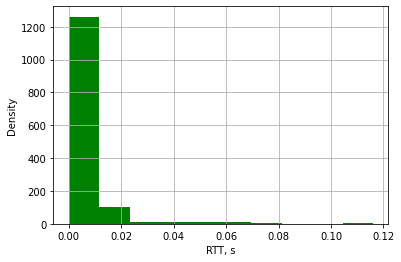

In [79]:
data.ack_rtt.hist(color="green")
plt.xlabel('RTT, s'); plt.ylabel('Density')

<AxesSubplot:>

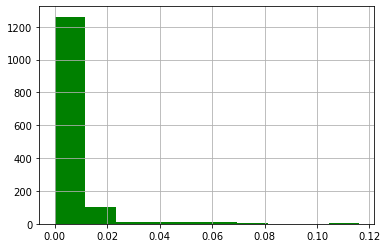

In [80]:
data[(~data.ack_rtt.isnull())].ack_rtt.hist(color="green")

In [65]:
packs = data[(data.tcpstream == 0)]['time_epoch dstip srcip tcpsrcport tcpdstport tcpseq tcpflagsrst tcpflagsstr initial_rtt ack_rtt response_time total_tcp_rst tsval tsecr'.split()]
packs[(~packs.initial_rtt.isnull())]["initial_rtt"]

3       0.001129
4       0.001129
5       0.001129
6       0.001129
7       0.001129
8       0.001129
2614    0.001129
2615    0.001129
Name: initial_rtt, dtype: float64

In [101]:
domainstreams = data[(data.host == 'www.aljazeera.net')]

In [66]:
streamarr = []
for streamid in data.tcpstream.unique():
    streampackets = data[(data.tcpstream == streamid)]['time_epoch dstip srcip tcpsrcport tcpdstport tcpseq tcpflagsrst tcpflagsstr initial_rtt ack_rtt response_time total_tcp_rst tsval tsecr'.split()]
    streaminfo = {
        "streamid": streamid,
        "time_epoch_start": streampackets['time_epoch'].iloc[0],
        "time_epoch_end": streampackets['time_epoch'].iloc[-1],
        "ip1": streampackets["srcip"].iloc[0],
        "ip2": streampackets["dstip"].iloc[0],
        "port1": streampackets["tcpsrcport"].iloc[0],
        "port2": streampackets["tcpdstport"].iloc[0],
        "initial_rtt": streampackets[(~streampackets.initial_rtt.isnull())]["initial_rtt"].iloc[0] if streampackets[(~streampackets.initial_rtt.isnull())]["initial_rtt"].size > 0 else None,
        "ack_rtt_avg": streampackets.ack_rtt.mean(),
        "num_rst": streampackets.tcpflagsrst.sum(),
    }
    streamarr.append(streaminfo)

In [69]:
streams = pd.DataFrame.from_dict(streamarr)
streams

,streamid,time_epoch_start,time_epoch_end,ip1,ip2,port1,port2,initial_rtt,ack_rtt_avg,num_rst
0,0,0.010336,1.441507,172.25.62.33,104.104.111.91,52774.0,80.0,0.001129,0.000564,0.0
1,1,0.017354,1.441569,172.25.62.33,104.104.111.91,51822.0,443.0,0.001230,0.000461,2.0
2,2,0.036734,1.441478,172.25.62.33,104.104.111.91,51824.0,443.0,0.001031,0.000813,2.0
3,3,0.037079,1.441530,172.25.62.33,104.104.111.91,51826.0,443.0,0.001224,0.001443,2.0
4,4,0.037717,1.441669,172.25.62.33,104.104.111.91,51828.0,443.0,0.001233,0.001553,2.0
5,5,0.038327,1.441620,172.25.62.33,104.104.111.91,51830.0,443.0,0.001176,0.001634,2.0
6,6,0.038472,1.441634,172.25.62.33,104.104.111.91,51832.0,443.0,0.001117,0.002624,2.0
7,7,0.044534,1.454359,172.25.62.33,3.232.182.227,46230.0,443.0,0.013759,0.004876,0.0
8,8,0.176848,1.463331,172.25.62.33,3.134.196.199,53318.0,443.0,0.023044,0.015988,0.0
9,9,0.328496,1.441196,172.25.62.33,13.35.78.41,53834.0,443.0,0.000789,0.000318,0.0


In [108]:
domainstreamsarr = []
for streamid in domainstreams.tcpstream.unique():
    streampackets = domainstreams[(domainstreams.tcpstream == streamid)]['time_epoch dstip srcip tcpsrcport tcpdstport tcpseq tcpflagsrst tcpflagsstr initial_rtt ack_rtt response_time total_tcp_rst tsval tsecr'.split()]
    streaminfo = {
        "streamid": streamid,
        "time_epoch_start": streampackets['time_epoch'].iloc[0],
        "time_epoch_end": streampackets['time_epoch'].iloc[-1],
        "ip1": streampackets["srcip"].iloc[0],
        "ip2": streampackets["dstip"].iloc[0],
        "port1": streampackets["tcpsrcport"].iloc[0],
        "port2": streampackets["tcpdstport"].iloc[0],
        "initial_rtt": streampackets[(~streampackets.initial_rtt.isnull())]["initial_rtt"].iloc[0] if streampackets[(~streampackets.initial_rtt.isnull())]["initial_rtt"].size > 0 else None,
        "ack_rtt_avg": streampackets.ack_rtt.mean(),
        "num_rst": streampackets.tcpflagsrst.sum(),
    }
    domainstreamsarr.append(streaminfo)
domainstreamsdata = pd.DataFrame.from_dict(domainstreamsarr)
domainstreamsdata

,streamid,time_epoch_start,time_epoch_end,ip1,ip2,port1,port2,initial_rtt,ack_rtt_avg,num_rst
0,0.0,0.016953,0.016953,172.25.50.98,104.104.111.91,36758.0,80.0,0.001269,NaN,0.0
1,1.0,0.054247,0.554106,172.25.50.98,104.104.111.91,52670.0,443.0,0.001250,0.005178,0.0
2,2.0,0.080451,0.553144,172.25.50.98,104.104.111.91,52672.0,443.0,0.001174,0.001255,0.0
3,3.0,0.080497,0.542676,172.25.50.98,104.104.111.91,52674.0,443.0,0.001141,0.001995,0.0
4,4.0,0.081987,0.553102,172.25.50.98,104.104.111.91,52676.0,443.0,0.001084,NaN,0.0
5,6.0,0.083687,0.541000,172.25.50.98,104.104.111.91,52680.0,443.0,0.001187,NaN,0.0


Text(0.5, 1.0, 'Plot of initial RTT vs time')

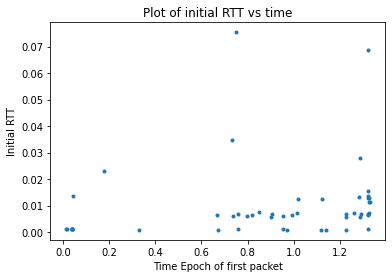

In [70]:
# Initial RTT over time
plt.scatter(streams.time_epoch_start, streams.initial_rtt, marker=".")
plt.xlabel("Time Epoch of first packet")
plt.ylabel("Initial RTT")
plt.title("Plot of initial RTT vs time")


Text(0.5, 1.0, 'Plot of initial RTT vs time in packets to aljazeera.net')

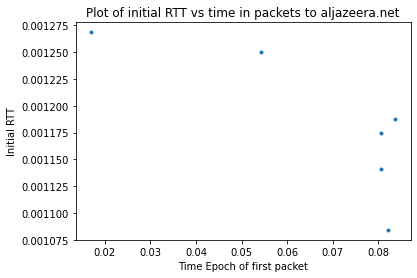

In [110]:
plt.scatter(domainstreamsdata.time_epoch_start, domainstreamsdata.initial_rtt, marker=".")
plt.xlabel("Time Epoch of first packet")
plt.ylabel("Initial RTT")
plt.title("Plot of initial RTT vs time in packets to aljazeera.net")


Text(0.5, 1.0, 'Plot of initial RTT vs time')

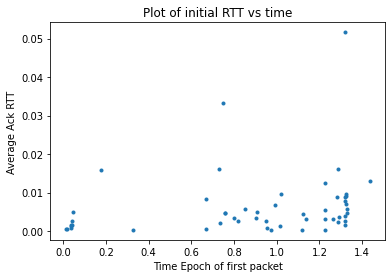

In [71]:
# Average Ack RTT over time
plt.scatter(streams.time_epoch_start, streams.ack_rtt_avg, marker=".")
plt.xlabel("Time Epoch of first packet")
plt.ylabel("Average Ack RTT")
plt.title("Plot of Average Ack RTT vs time")

Text(0.5, 1.0, 'Plot of Average Ack RTT vs time in packets to aljazeera.net')

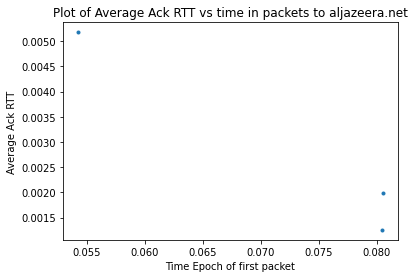

In [111]:
plt.scatter(domainstreamsdata.time_epoch_start, domainstreamsdata.ack_rtt_avg, marker=".")
plt.xlabel("Time Epoch of first packet")
plt.ylabel("Average Ack RTT")
plt.title("Plot of Average Ack RTT vs time in packets to aljazeera.net")